# 군집분석 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree,fcluster
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering,KMeans,MeanShift,DBSCAN,OPTICS
from sklearn.metrics.pairwise import manhattan_distances,euclidean_distances
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler,StandardScaler
import warnings 
warnings.filterwarnings('ignore')

## 1. 개요

- 각 개체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하고 군집에 속한 개체들의 유사성과 서로 다른 군집에 속한 객체간의 상이성을 규명하는 분석 방법
- 범주에 대한 사전 정보가 없기에 **비지도 학습**에 속한다.
- 군집 개수나 구조에 대한 가정 없이 데이터로부터 거리를 기준으로 군집화 유도
- 군집 분석 활용 예 : 생물의 종 구분, 시장세분화, 고객세분화

## 2. 군집분석 문제

#### 가깝다는 것을 어떻게 정의할 것인가?
- 유클리디안, 체비셰프, 코사인 등으로 정의

#### 어떤 방식으로 군집화할 것인가?
- 계층적 군집방법, 비계층적 군집방법, model-based 군집 등

#### 어떻게 시각화할 것인가?
- Heatmap, Bar Graph 등 활용

#### 군집 결과를 어떻게 해석할 것인가?

## 3. 거리측정

### 1) 유클리드 거리

- $d_{ij} = \sqrt{∑_k(x_{ik}−x_{jk})^2}$

- 두 점 사이를 잇는 직선거리로 측정
- 주로 표준화하된 자료에 사용(Scaling)

In [7]:
distance.euclidean((1,1),(2,2))

1.4142135623730951

In [13]:
euclidean_distances([[1,1],[2,2]])

array([[0.        , 1.41421356],
       [1.41421356, 0.        ]])

### 2) 맨하탄 거리

- $d_{ij} = \sum_k{|x_{ik} - x_{jk}|}$
- 좌표값 차이의 절대값의 합으로 표현

In [10]:
manhattan_distances([[1, 2], [3, 4]],         [[1, 2], [0, 3]])

array([[0., 2.],
       [4., 4.]])

### 3) 마할라노비스 거리

- $D_{ij} = (X_i - X_j)S^{-1} (X_i - X_j)$

- 공분산 행렬을 고려한 거리
- Rotation과 Scale에 의해 자료 변환하여 공분산행렬을 I로 만드는 효과
- 어떤 값이 얼마나 일어나기 힘든 값인지, 또는 얼마나 이상한 값인지를 수치화하는 한 방법이다.
- 어떤 데이터가 가짜 데이터인지, 아니면 진짜 데이터인지를 구분하는 용도로 주로 사용된다.

In [15]:
iv = [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]
distance.mahalanobis([1, 0, 0], [0, 1, 0], iv)

1.0

### 4) 그 외 거리 
- 체비셰프
- 캔버라
- 코사인
- 민코우스키 등

### 5) 범주형 변수의 경우 거리 측정

- 자카드 거리
- 자카드 계수

## 3. 계층적 군집방법(Hierarchical Clustering)

- 관측치 간의 유사성을 계산하여 가까운 개체들 군집화
- Dendrogram을 통해 군집형성 과정 파악 가능
- 군집 간의 거리를 정의하는 방법에 따라 Single/Complete/Average 등으로 구분

### 1) Single Linkage Method

- 군집i에 속한군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 중 가장 짧은 거리를 군집i와 군집j의 거리로 정의

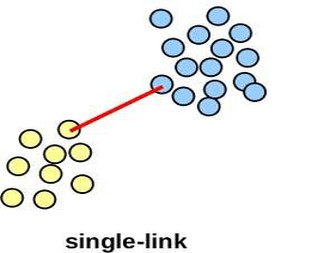

- 계산이 효율적, 길다란 형태의 군집 형성 가능

### 2) Complete Linkage Method

- 가장 긴 거리를 군집i와 군집j의 거리로 정의
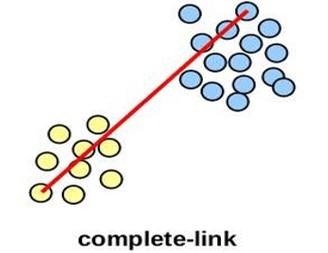

- 군집과 군집을 합할 때 군집의 모든 개체가 서로 가깝게 됨
- Single linkage에 비해 convex한 군집 형성
- 이상치에 민감

### 3) Average Linkage Method

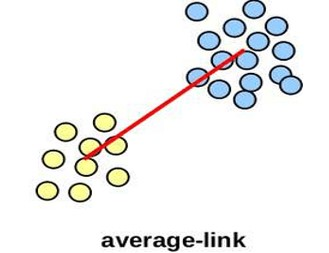

### Ward Linkage Method

- 매 단계에서 군집 간 정보의 손실을 최소화 하도록 군집
- 군집내 편차들의 제곱합을 고려한 방법
- 비슷한 크기의 군집을 생성하는 경향
- 비계층적 군집화 방법과 비슷한 결과를 생성한다.

### 4) 예시

In [54]:
df = pd.read_csv('Boston_house.csv')

'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [56]:
target = df['Target']
df.drop(['Target'],axis = 1, inplace = True)

In [68]:
robust = RobustScaler()
standard = StandardScaler()

In [72]:
robust_df = pd.DataFrame(robust.fit_transform(df),columns=df.columns)
st_df = pd.DataFrame(standard.fit_transform(df),columns=df.columns)

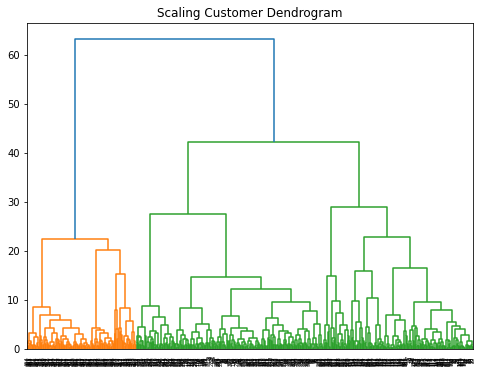

In [74]:
plt.figure(figsize = (8,6))
plt.title("Scaling Customer Dendrogram")
dend = dendrogram(linkage(st_df,method='ward'))

- method에 single, average, complete 등 거리 정의 방식을 넣으면 된다.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

- affinity에  "euclidean", "l1", "l2","manhattan", "cosine", "precomputed" 등 사용 가능

- linkage는 위와 같음

- ward linkage를 사용할 경우 euclidean만 사용할 수 있다.(**주의**)

In [78]:
print(np.mean([x for x, y in zip(target,cluster.fit_predict(st_df)) if  y == 0]))
print(np.mean([x for x, y in zip(target,cluster.fit_predict(robust_df)) if  y == 0]))

24.835602094240834
23.528351648351652


In [79]:
print(np.mean([x for x, y in zip(target,cluster.fit_predict(st_df)) if  y == 1]))
print(np.mean([x for x, y in zip(target,cluster.fit_predict(robust_df)) if  y == 1]))

15.438709677419354
13.650980392156862


In [80]:
robust_df.iloc[cluster.fit_predict(robust_df)==0,:].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,-0.232559,-0.336238,0.136733,0.572070,0.253091,0.054216,0.046662,0.015469,-0.254513,0.169780,1.010989,0.144941,0.074725
std,0.580560,0.977875,0.959402,1.425245,0.688853,0.525996,0.677274,0.629736,0.770605,0.400102,1.941394,0.410207,0.263237
min,-1.520897,-5.065835,-3.587398,-0.069593,-0.672824,-0.714950,-0.962519,-0.874286,-2.303571,-0.200000,0.000000,-0.369509,0.000000
25%,-0.742100,-0.423072,-0.434282,-0.051831,-0.315292,-0.368706,-0.475262,-0.520000,-0.750000,-0.050000,0.000000,-0.136951,0.000000
50%,-0.114169,0.064276,0.010163,-0.017983,0.093176,-0.120062,-0.106947,-0.102857,-0.160714,0.000000,0.000000,-0.059432,0.000000
75%,0.311927,0.261902,0.571816,0.292525,0.710257,0.651433,0.378311,0.405714,0.410714,0.150000,1.600000,0.263566,0.000000
max,0.458716,0.261902,3.484417,11.480462,2.888060,1.398141,2.659670,1.902857,1.053571,0.950000,8.000000,0.984496,1.000000


In [83]:
st_df.iloc[cluster.fit_predict(st_df)==0,:].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,-0.244215,0.263695,0.138966,-0.362506,0.265495,-0.329801,-0.296658,-0.322215,-0.261820,-0.539252,0.158318,-0.496950,0.088487
std,1.007777,0.429622,0.969166,0.119561,1.005831,0.939720,0.831231,0.903638,1.023534,0.371949,1.107039,0.563636,1.138441
min,-2.335437,-3.134425,-1.968357,-0.419782,-1.267069,-1.557842,-1.531127,-1.465882,-2.707379,-0.982843,-0.487722,-1.313990,-0.272599
25%,-1.137046,0.292046,-0.509151,-0.413387,-0.593840,-1.034027,-0.914713,-0.999412,-0.927284,-0.637962,-0.487722,-0.821030,-0.272599
50%,-0.121791,0.394563,-0.076411,-0.404484,0.089563,-0.616727,-0.450387,-0.481112,-0.118149,-0.637962,-0.487722,-0.601276,-0.272599
75%,0.724550,0.434144,0.625946,-0.373236,0.915493,-0.079780,0.118017,-0.066472,0.344213,-0.523001,0.456508,-0.112770,-0.272599
max,1.117494,0.441052,3.555044,0.624859,3.960518,2.422565,3.049752,2.732346,1.638828,1.661245,3.804234,1.798194,3.668398


### Heatmap

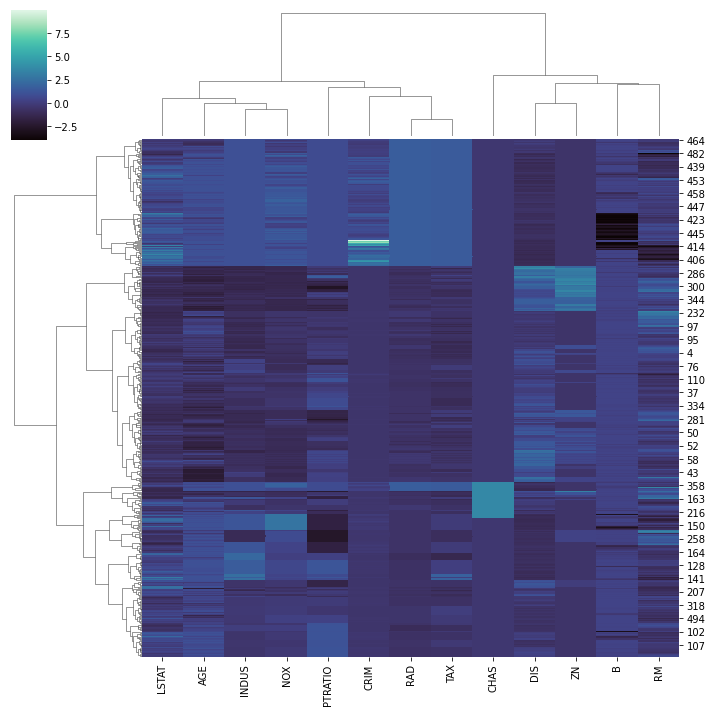

In [82]:
sns.clustermap(st_df,metric ='euclidean',method = 'ward',cmap= 'mako')

### 각 군집의 변수 값의 평균을 비교하여 군집의 특성 파악

In [85]:
robust_df['cluster'] = cluster.fit_predict(robust_df)

<Figure size 432x288 with 0 Axes>

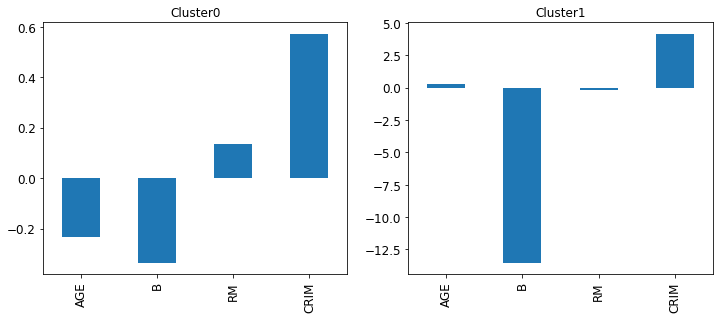

In [94]:
i = 0
plt.figure()
fig,ax = plt.subplots(1,2,figsize = (12,4))
for num in robust_df['cluster'].unique() :   
    i+=1
    plt.subplot(1,2,i)
    plt.title("Cluster{}".format(num),fontsize = 12)
    robust_df.loc[robust_df['cluster'] == num].iloc[:,:4].mean().plot.bar()
    locs,labels = plt.xticks()
    plt.subplots_adjust(hspace =.6, top = 1)
    plt.tick_params(axis = 'both',which = 'major',labelsize = 12)
plt.show()

In [96]:
st_df['cluster'] = cluster.fit_predict(st_df)
st_df['color'] = np.where(st_df['cluster']==1, 'red',
        'blue')

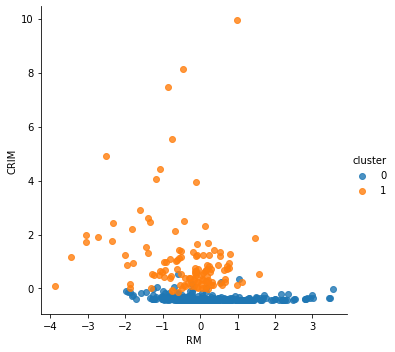

In [104]:
sns.lmplot(data=st_df, x='RM', y='CRIM', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### 5) 군집개수 결정 방법

#### 군집개수 결정
- 탐색적으로 사용하여 군집개수를 선정한다.
- 명확한 정답이 없음

#### Rule of Thumb
- 덴드로그램 높이 변화의 크기 조사하여 큰 변화가 있는 곳에서 자른다.
- 거리 차이에 큰 변화를 보이는 경우를 고려해 군집 개수 결정
- ESS 증가가 급격한 위치에서 군집의 개수 결정

#### cutree 함수 사용하여 군집분석의 해를 얻는다.
- 데이터의 왜곡 정도가 심한 경우 로그변환을 취하면 개선이 가능하다.

In [119]:
st_df = st_df.iloc[:,:-2]

In [122]:
cut_trees = cut_tree(linkage(st_df,method='ward'),n_clusters=4)

fcluster_cut = fcluster(linkage(st_df,method = 'ward'),t = 4, criterion='distance')

In [125]:
st_df['cut_tree_cluster'] = cut_trees + 1
st_df['fcluster'] = fcluster_cut

## 4. 비계층적 군집방법(Non-Hierarchical Clustering)

- n개의 개체를 g개의 군집으로 나눌 수 있는 모든 가능한 방법을 점검해 최적화한 군집을 형성하는 것

### 1) K-means

- 군집의 개수를 미리 설정한다.
- 초기 중심 값은 임의로 선택이 가능하며 초기 중심값의 선정에 따라 결과가 달라질 수 있다.
- 탐욕적 알고리즘으로 안정된 군집은 보장하지만 최적이라는 보장은 없다.

**장점**
- 알고리즘이 단순하며 빠르게 수행 가능
- 계층적 방법에 비해 많은 양의 데이터를 다룰 수 있다.
- 내부 구조에 대한 사전 정보가 없어도 된다.
- 다양한 형태의 데이터에 적용이 가능

**단점**
- 군집의 수, 가중치와 거리 정의가 어렵다.
- 사전에 주어진 목적이 없어 해석이 어렵다.
- 잡음이나 이상치에 영향을 받는다.
- 볼록한 형태가 아닌 (non-convex)군집이 존재할 경우 성능이 떨어진다.
- 초기 군집수 결정이 어렵다.

In [134]:
iris = load_iris()

In [135]:
X = iris.data[:, :2]
y = iris.target

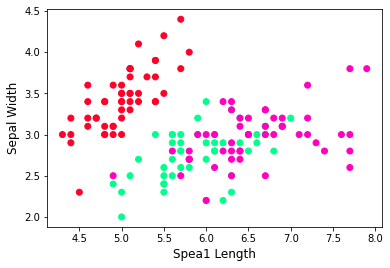

In [138]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.show()

In [140]:
km = KMeans(n_clusters=3, n_jobs=-1, random_state=123)
km.fit(X)

KMeans(n_clusters=3, n_jobs=-1, random_state=123)

In [141]:
centers = km.cluster_centers_
print(centers)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

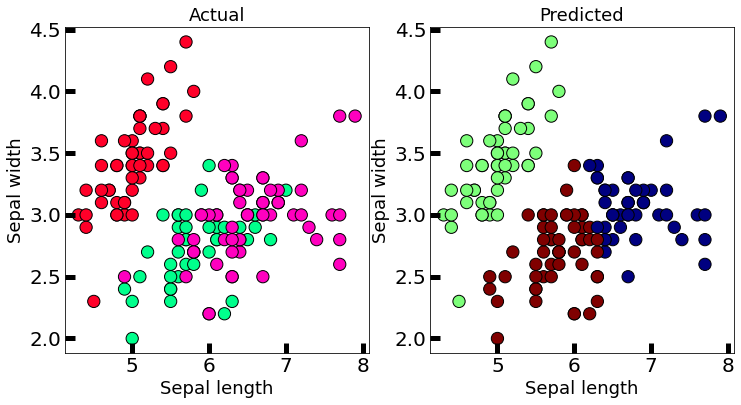

In [144]:
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

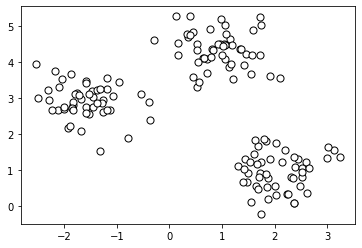

In [145]:
from sklearn.datasets import make_blobs
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [146]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

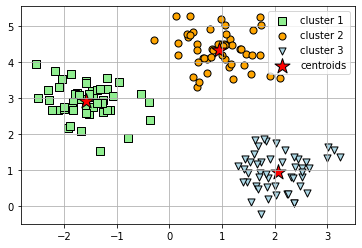

In [147]:

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

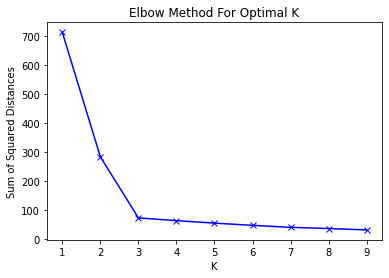

In [149]:
sum_of_squared_distances = []
k = range(1,10)
for i in k :
    km = KMeans(n_clusters=i)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(k,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title("Elbow Method For Optimal K")
plt.show()

In [151]:
from sklearn.metrics import silhouette_samples,silhouette_score

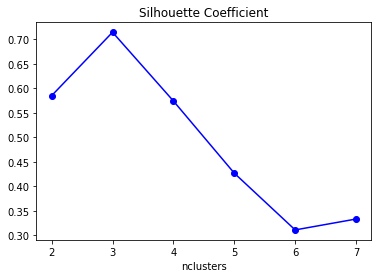

In [167]:
silhoutte_list = []
k = range(2,8)
for i in k :
    silhoutte_list.append(silhouette_score(X,KMeans(n_clusters=i,n_jobs=-1, random_state=123).fit_predict(X)))
plt.plot(k,silhoutte_list,'bo-')
plt.xlabel('nclusters')
plt.title("Silhouette Coefficient")
plt.show()

### 2) Kmeans를 이용한 자연어 군집 처리

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)


In [204]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [205]:
order_centroids = model.cluster_centers_.argsort()[:,::-1] ## argsort를 이용하여 array 정렬 후 역순으로 다시 배치

terms = vectorizer.get_feature_names()

In [ ]:
df = pd.DataFrame({"Word" : tfidf.get_feature_names()})
cl0 = kmeans.cluster_centers_.argsort()[:,::-1][:,:10][0]
df.loc[cl0.tolist()]['Word'].tolist()

- 군집별로 핵심단어 10개씩 추출

In [209]:
[x for x, y in zip(documents, model.labels_) if  y == 2]

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'This is a cat houseClimbing ninja cat kitty.']

In [210]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I want to have a dog"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[1]
[0]
[2]


### 3) Mean Shift

- 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(kernel nebsity estimation)를 이용한다.

- 평균이동은 군집의 개수를 지정할 필요가 없기 때문에 대역폭 크기를 어떤 값으로 지정하냐에 따라 군집화의 품질이 결정된다.


**장점**
- K-Means와 대조적으로 이 알고리즘은 클래스 혹은 그룹의 개수를 정할 필요가 없다. Mean-Shift가 자동적으로 발견한다.

**단점**
- kernel = 반지름 r 사이즈를 선택해야 한다.

In [212]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=12)
meanshift = MeanShift(bandwidth=1.4)
# clustering 레이블 반환(이 레이블은 실제 y값 레이블과 수치적으로 동일매핑 아님!)
cluster_labels = meanshift.fit_predict(X)
print('Cluster Label 유형:',np.unique(cluster_labels))

Cluster Label 유형: [0 1 2]


- estimate_bandwidth는 최적화된 bandwidth 값을 반환한다.

In [213]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.499


## 3.Model-based clustering

### 1) Gaussian Mixture Model

- 각 군집에 속하는 관측치가 서로 다른 확률분포를 가지는 모집단에서 추출되었다고 가정하에 모형을 추정하고 이에 기반하여 군집화

- EM 알고리즘을 통해 평균과 공분산 행렬을 추정
- 각 관측치에 대해 각 군집에 속할 사후 확률(posterior probability)을 계산하여 가장 확률이 높은 군집으로 할당
- 모형선택방법 BIC (Bayesian information criterion)을 사용해 군집의 개수 및 적절한 공분산행렬의 모양 선택 가능(BIC가 최대가 되는 모형을 선택한다.)

- **BIC = 2 * loglikelihood**

In [214]:
from sklearn.mixture import GaussianMixture

In [275]:
iris = load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

In [295]:
scale_df = pd.DataFrame(standard.fit_transform(data.iloc[:,:-1]),columns=data.columns[:-1])

In [479]:
k = [1,2,3,4,5,6,7,8,9,10]
type_list = ['spherical','tied','diag','full']
spherical_list = []
tied_list = []
diag_list = []
full_list = []

for i in k :
    gmm = GaussianMixture(n_components=i).fit(sdf)
for i in k :
    for types in type_list :
        gmm = GaussianMixture(n_components=i,covariance_type=types).fit(sdf)
        if types == 'spherical' :
            spherical_list.append(gmm.bic(sdf))
        elif types =='tied' :
            tied_list.append(gmm.bic(sdf))
        elif types =='diag':
            diag_list.append(gmm.bic(sdf))
        else :
            full_list.append(gmm.bic(sdf))

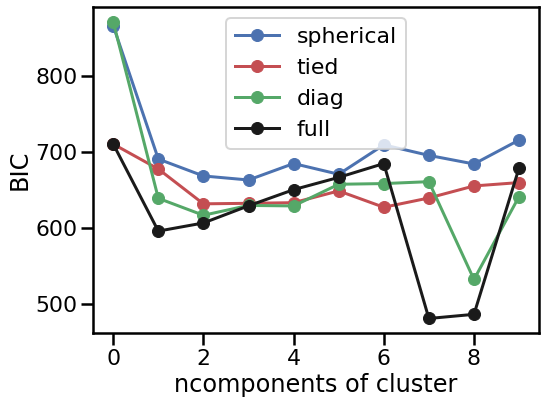

In [488]:
plt.figure(figsize = (8,6))
plt.plot(spherical_list,'bo-')
plt.plot(tied_list,'ro-')
plt.plot(diag_list,'go-')
plt.plot(full_list,'ko-')
plt.legend(type_list)
plt.ylabel("BIC")
plt.xlabel("ncomponents of cluster")
plt.show()

In [ ]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [356]:
def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
    plt.title("iteration: {}".format(n))

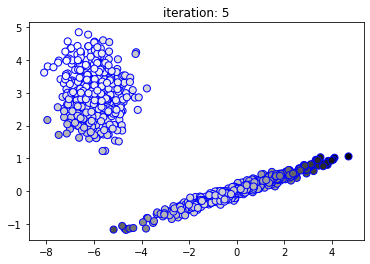

In [358]:
plot_gaussianmixture(5)

In [501]:
x = sdf['Petal width'].values

In [506]:
f = np.ravel(x).reshape(-1,1)

In [507]:
g = GaussianMixture(n_components=3).fit(f)

In [509]:
weights = g.weights_
means = g.means_
covars = g.covariances_

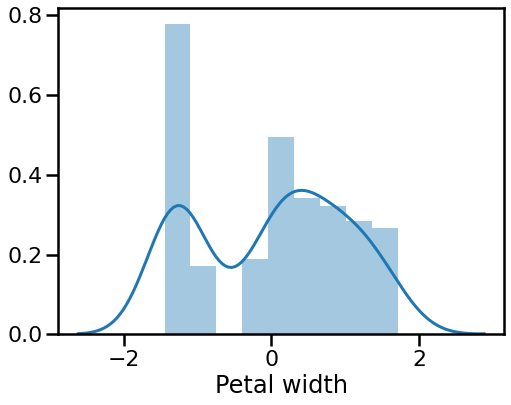

In [525]:
plt.figure(figsize = (8,6))
sns.distplot(sdf['Petal width'],bins='auto')
plt.show()

### 2) DBSCAN
- 데이터포인트가 많은 Dense Region을 찾아 군집 형성
- 비교적 비어있는 지역을 경계로 다른 클러스터와 구분

**특징**
- 매우 큰 데이터에 사용 가능
- 여러 번 실행해도 core sample의 군집은 언제나 동일
- Boundary sample의 클러스터 할당은 입력 순서에 따라 달라짐(보통 수가 많지 않으므로 큰 문제 안됨)
- 클러스터 개수의 자동 선택
- 복잡한 형상의 clustering 가능

#### eps가 커지면
- 한 클러스터에 포함되는 sample증가
- noise sample 감소

#### minPts가 커지면
- core sample 감소
- noise sample 증가

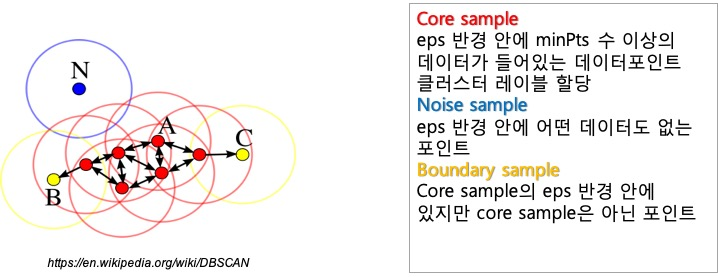

In [391]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [394]:
df = data.iloc[:,:-1]

In [396]:
df['predict'] = dbscan.fit_predict(df)

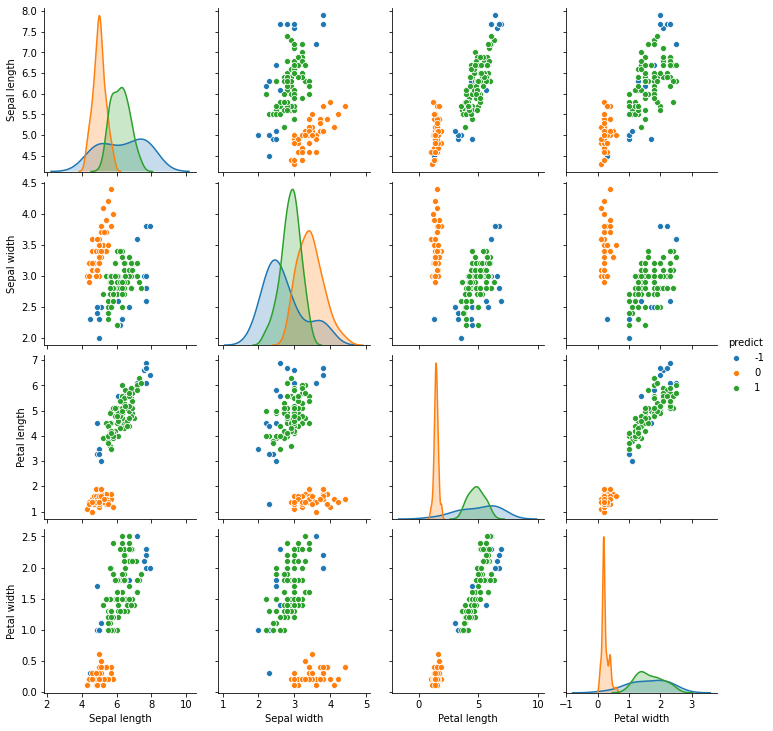

In [399]:
sns.pairplot(df,hue='predict')
plt.show()

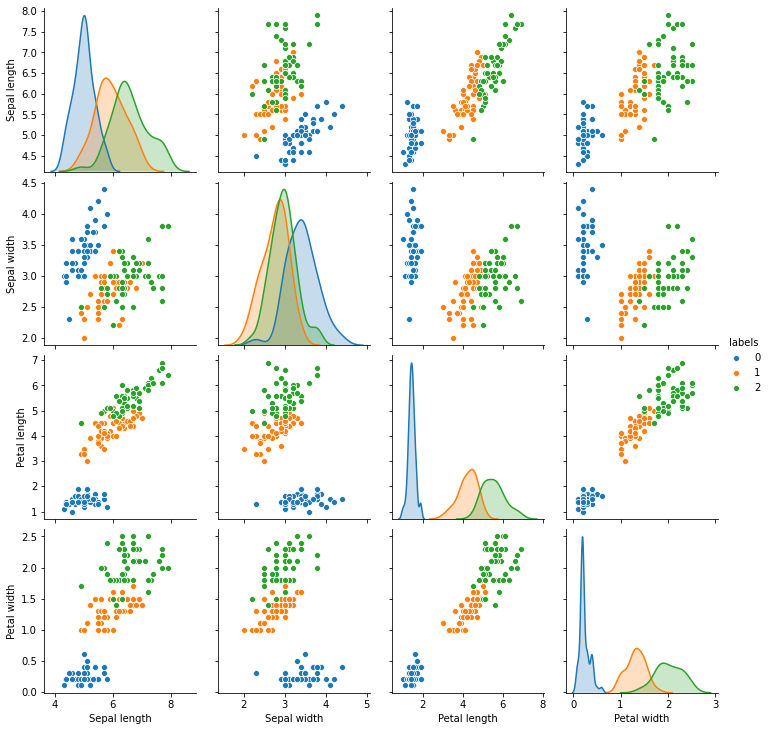

In [401]:
sns.pairplot(data,hue = 'labels')

In [475]:
import time
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [469]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.iloc[:,0], data.iloc[:,1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)

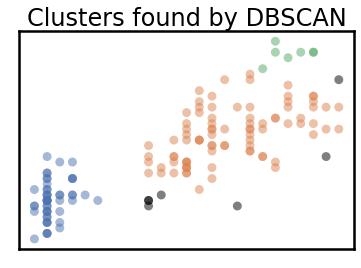

In [477]:
plot_clusters(sdf,DBSCAN,(),{'eps' : 0.4})

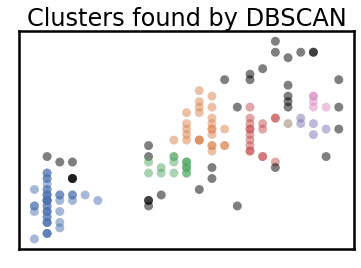

In [476]:
plot_clusters(sdf,DBSCAN,(),{'eps' : 0.25})

### 3) OPTICS

- 군집화 구조 식별을 위해 부가적 순서 생성

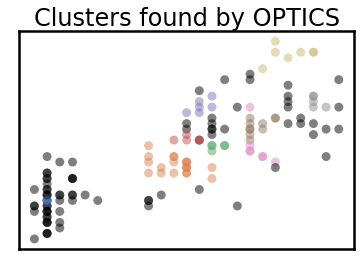

In [493]:
plot_clusters(sdf,OPTICS,(),{'eps' : 0.4})

In [ ]:
def elbow_kmeans(data,col) :
    dataf = data[[col]]
    sse = {}
    for k in range(1,10) :
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dataf)
        dataf['Clusters'] = kmeans.labels_
        sse[k] = kmeans.inertia_
        
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Num of Cluster")
    plt.show()

In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

- 군집별로 점수 매길때 활용(R은 False, fm은 True)
- 낮을수록 좋은거면 True, 높을수록 좋은거면 False